na podstawie: dzialajaca detekcja z kamery face_detection.ipynb https://colab.research.google.com/drive/1HDNXUxQIndz_6O8i_leHYl8mSiBHA-ke#scrollTo=pCLWBnscEns9

oraz

rozpoznawanie_twarzy.ipynb https://colab.research.google.com/drive/1TifbhBrfYm6lMH_noiRmd1YW-O1Arcw6?authuser=1#scrollTo=KimUoewppzBF



In [3]:
import imutils
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import os

In [4]:
!gdown https://github.com/GilLevi/AgeGenderDeepLearning/raw/master/models/age_net.caffemodel
!gdown https://github.com/GilLevi/AgeGenderDeepLearning/raw/master/models/gender_net.caffemodel
!gdown https://gist.github.com/GilLevi/c9e99062283c719c03de/raw/ddd9cf649c323041ee6e4731ff45636a09261597/deploy_age.prototxt
!gdown https://gist.github.com/GilLevi/c9e99062283c719c03de/raw/ddd9cf649c323041ee6e4731ff45636a09261597/deploy_gender.prototxt
!gdown https://github.com/opencv/opencv/raw/master/samples/dnn/face_detector/opencv_face_detector.pbtxt
!gdown https://github.com/spmallick/learnopencv/blob/master/AgeGender/opencv_face_detector_uint8.pb
!gdown https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
!gdown https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel

Downloading...
From: https://github.com/GilLevi/AgeGenderDeepLearning/raw/master/models/age_net.caffemodel
To: /content/age_net.caffemodel
100% 45.7M/45.7M [00:00<00:00, 206MB/s]
Downloading...
From: https://github.com/GilLevi/AgeGenderDeepLearning/raw/master/models/gender_net.caffemodel
To: /content/gender_net.caffemodel
100% 45.6M/45.6M [00:00<00:00, 196MB/s]
Downloading...
From: https://gist.github.com/GilLevi/c9e99062283c719c03de/raw/ddd9cf649c323041ee6e4731ff45636a09261597/deploy_age.prototxt
To: /content/deploy_age.prototxt
100% 2.31k/2.31k [00:00<00:00, 3.84MB/s]
Downloading...
From: https://gist.github.com/GilLevi/c9e99062283c719c03de/raw/ddd9cf649c323041ee6e4731ff45636a09261597/deploy_gender.prototxt
To: /content/deploy_gender.prototxt
100% 2.31k/2.31k [00:00<00:00, 3.66MB/s]
Downloading...
From: https://github.com/opencv/opencv/raw/master/samples/dnn/face_detector/opencv_face_detector.pbtxt
To: /content/opencv_face_detector.pbtxt
35.0kB [00:00, 34.6MB/s]       
Downloading...

In [5]:
!gdown https://media.teleman.pl/photos/Rodzina-Zastepcza-Leki-Pierwotne-2009.jpg
os.rename('Rodzina-Zastepcza-Leki-Pierwotne-2009.jpg', 'test1.jpg')

Downloading...
From: https://media.teleman.pl/photos/Rodzina-Zastepcza-Leki-Pierwotne-2009.jpg
To: /content/Rodzina-Zastepcza-Leki-Pierwotne-2009.jpg
100% 123k/123k [00:00<00:00, 363kB/s]


In [6]:
#podaj scieżkę pliku , np.: test1, test2, test3
image_file = 'test1.jpg'

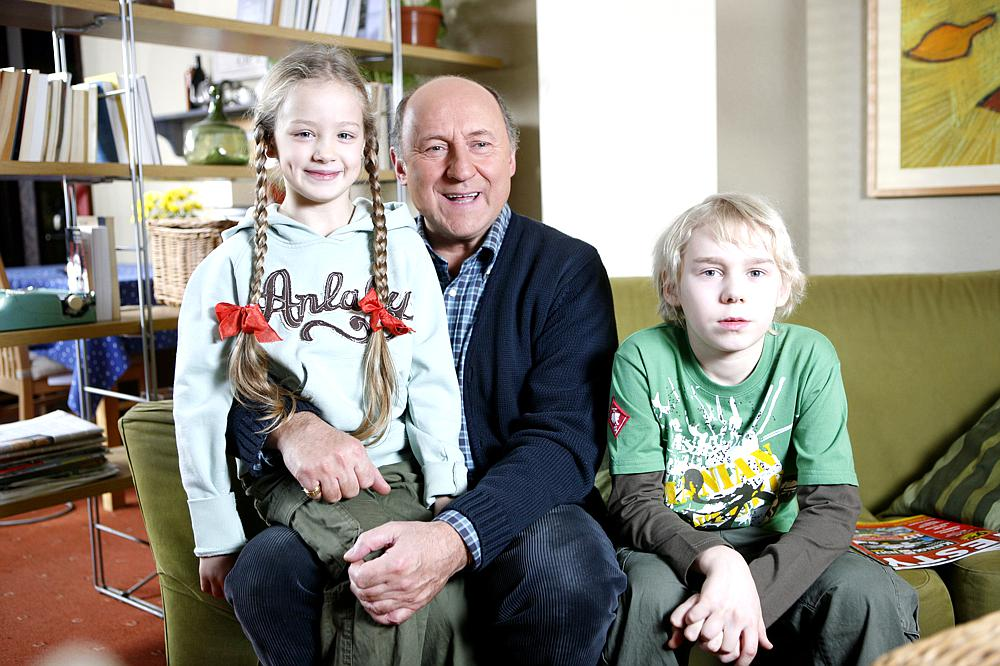

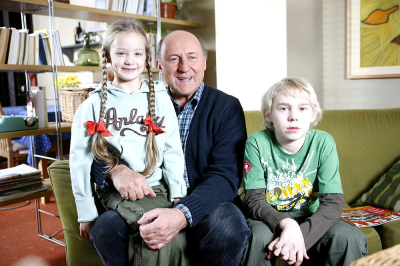

In [7]:
#Wczytanie pliku
image = cv2.imread(image_file, cv2.IMREAD_UNCHANGED)
cv2_imshow(image)
# ustawienie szerokosci na 400 px
image = imutils.resize(image, width=400)
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
cv2_imshow(image)

In [8]:
#wczytanie modelu
prototxt = 'deploy.prototxt'
model = 'res10_300x300_ssd_iter_140000.caffemodel'
net = cv2.dnn.readNetFromCaffe(prototxt, model)

#wiek i plec
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
age_list = ['(0, 2)', '(4, 6)', '(8, 12)', '(15, 20)', '(25, 32)', '(38, 43)', '(48, 53)', '(60, 100)']
gender_list = ['Male', 'Female']

age_net = cv2.dnn.readNetFromCaffe('deploy_age.prototxt', 'age_net.caffemodel')
gender_net = cv2.dnn.readNetFromCaffe('deploy_gender.prototxt', 'gender_net.caffemodel')

In [9]:
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  faces = face_cascade.detectMultiScale(gray, 1.1, 5)
  font = cv2.FONT_HERSHEY_SIMPLEX

Found 3 faces:
Gender : Female
Age Range: (4, 6)


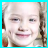

Gender : Male
Age Range: (48, 53)


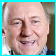

Gender : Male
Age Range: (0, 2)


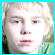

In [10]:
if(len(faces)>0):
   print("Found {} faces:".format(str(len(faces))))

for (x, y, w, h )in faces:
  cv2.rectangle(image, (x, y), (x+w, y+h), (255, 255, 0), 2)
  # szukanie twarzy 
  face_img = image[y:y+w, x:x+w].copy()
  blob = cv2.dnn.blobFromImage(face_img, 1, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
  # predykcja plci 
  gender_net.setInput(blob)
  gender_preds = gender_net.forward()
  gender = gender_list[gender_preds[0].argmax()]
  print("Gender : " + gender)
  #predykcja wieku
  age_net.setInput(blob)
  age_preds = age_net.forward()
  age = age_list[age_preds[0].argmax()]
  print("Age Range: " + age)

  
  overlay_text = "%s %s" % (gender, age)
  cv2.putText(image, overlay_text, (x, y), font, 1, (255, 255, 255), 2, cv2.LINE_AA)
  cv2_imshow(face_img)


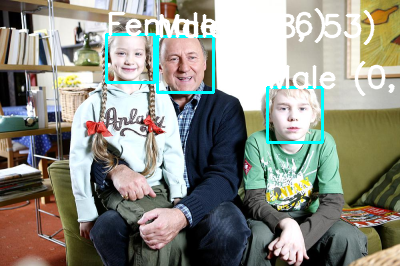

In [ ]:
cv2_imshow(image)